# Báo cáo thực tập xử lý ảnh nhóm 2 sáng thứ 4 

#### Nguyễn Tất Ý 20161399
#### Phạm Đức Thắng 20161373
#### Huỳnh Anh Đức 20161307
#### Vũ Xuân Phú 20161083

In [1]:
from matplotlib import pyplot as plt
from skimage.filters import sobel
from skimage import color
import os

Đọc ảnh từ thư viện 

# Đọc ảnh từ video lấy vị trị frame thứ 100 trong video 

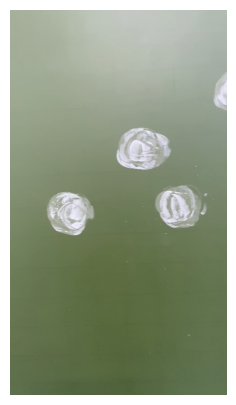

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
cap =  cv2.VideoCapture(r'video\san_pham.mp4')
frame_index = 100 
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, frame = cap.read()
image1 = frame
if  ret:
        fig = plt.figure(figsize=(10, 5))
        plt.imshow(frame)
        plt.axis('off')
        plt.show()
        cap.release()
else:
    print('Không thể đọc khung hình thứ {} từ video.'.format(frame_index))

Hàm so sánh ảnh hiển thị hai ảnh cùng lúc 

In [3]:

def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("original")
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")

In [4]:
def plot_comparison_4(original, filtered1,filtered2,filtered3):
    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(ncols=2,nrows=2, figsize=(8, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("filtered1")
    ax1.axis("off")
    ax2.imshow(filtered1, cmap=plt.cm.gray)
    ax2.set_title("filtered2")
    ax2.axis("off")
    ax3.imshow(filtered2, cmap=plt.cm.gray)
    ax3.set_title("filtered3")
    ax3.axis("off")
    ax4.imshow(filtered3, cmap=plt.cm.gray)
    ax4.set_title("filtered4")
    ax4.axis("off")

Hàm hiển thị hình ảnh 

In [5]:
def show_image(image, title='Image', cmap_type='gray'):  
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)  
    plt.axis('off')  
    plt.show()

 Chuyển ảnh gốc thành ảnh xám

## Xử lý ảnh dựa trên những điểm ảnh lân cận và biến đổi trong không gian

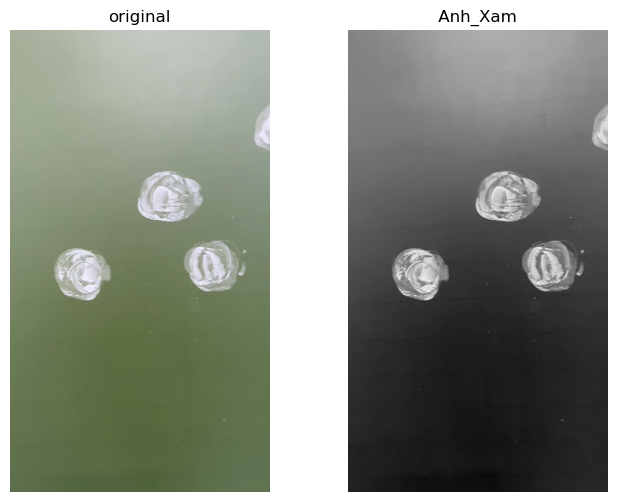

In [6]:
from skimage import color
image20= color.rgb2gray(image1)
plot_comparison(image1, image20, " Anh_Xam ")

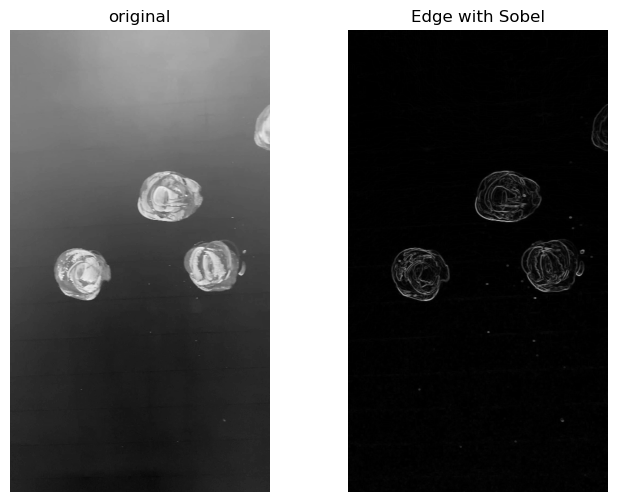

In [7]:

edge_sobel = sobel(image20)
plot_comparison(image20, edge_sobel, "Edge with Sobel")

###### Kết luận:
- Ảnh đầu vào chưa được mịn vì thế ngõ ra với bộ lọc sobel phát hiện nhiều cạnh bên trong 
- Giải pháp: 
    +  Xử lý ảnh đầu vào để mịn hơn có thể sử dụng bộ lọc gaussian để lọc mịn ảnh 


In [8]:
# Khai báo bộ lọc gausian
from skimage.filters import gaussian

Áp dụng bộ lọc với Sigma = 0.5

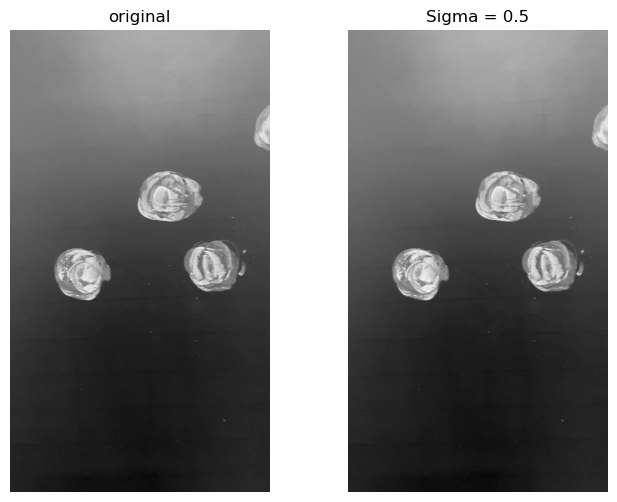

In [9]:
gaussian_image_sigma_0_5 = gaussian(image20,sigma=0.5,channel_axis=True)
plot_comparison(image20, gaussian_image_sigma_0_5, "Sigma = 0.5")

Áp dụng bộ lọc với Sigma = 2

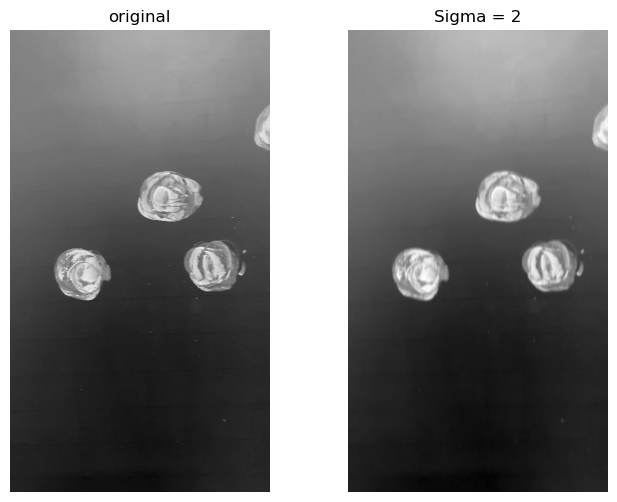

In [10]:
gaussian_image_sigma_2 = gaussian(image20,sigma=2,channel_axis=True)
plot_comparison(image20, gaussian_image_sigma_2, "Sigma = 2")

Áp dụng bộ lọc với Sigma = 4

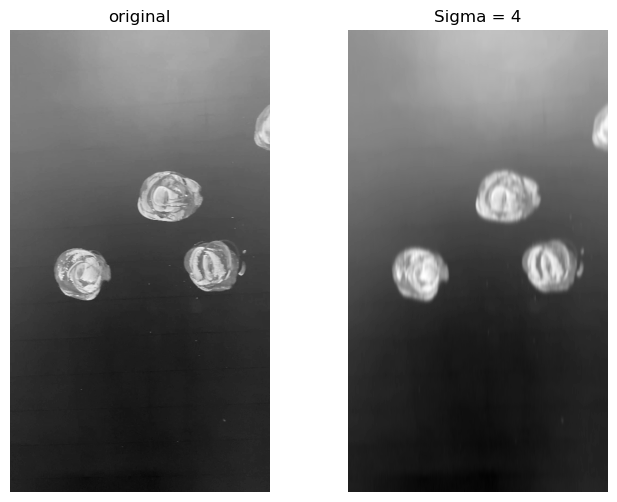

In [11]:
gaussian_image_sigma_4 = gaussian(image20,sigma=4,channel_axis=True)
plot_comparison(image20, gaussian_image_sigma_4, "Sigma = 4")

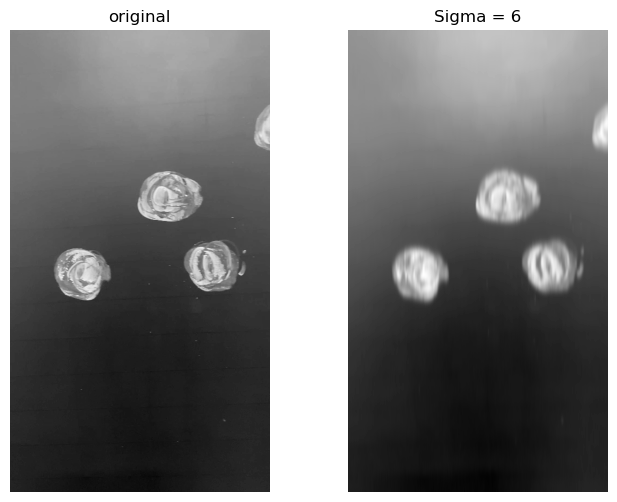

In [12]:
gaussian_image_sigma_10 = gaussian(image20,sigma=6,channel_axis=True)
plot_comparison(image20, gaussian_image_sigma_10, "Sigma = 6")

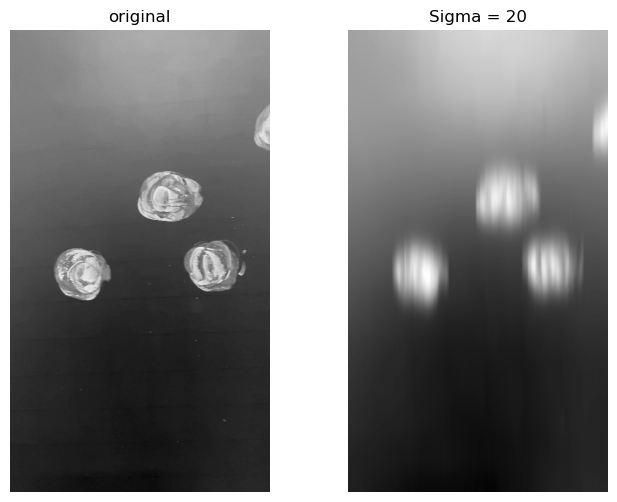

In [13]:
gaussian_image_sigma_20 = gaussian(image20,sigma=20,channel_axis=True)
plot_comparison(image20, gaussian_image_sigma_20, "Sigma = 20")

Sử dụng bộ lọc gaussian thay đổi hệ số sigma càng cao cho ta được ảnh mịn hơn

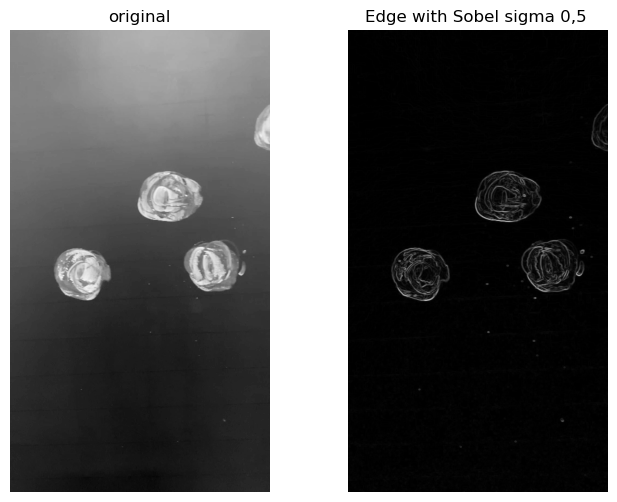

In [14]:

edge_sobel_image_sigma_0_5 = sobel(gaussian_image_sigma_0_5)
plot_comparison(gaussian_image_sigma_0_5, edge_sobel_image_sigma_0_5, "Edge with Sobel sigma 0,5 ")

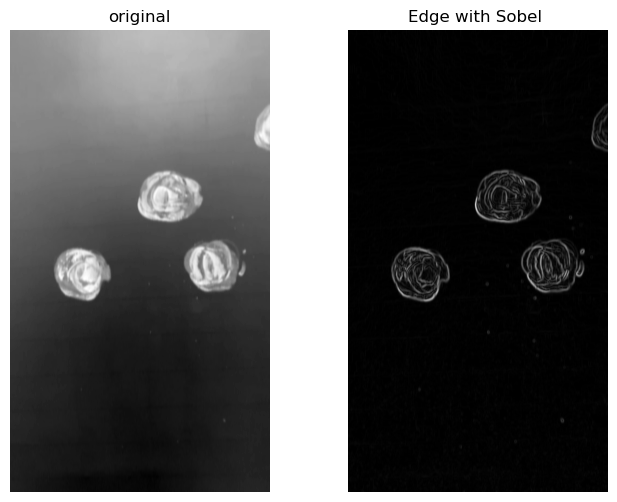

In [15]:

edge_sobel_image_sigma_2 = sobel(gaussian_image_sigma_2)
plot_comparison(gaussian_image_sigma_2, edge_sobel_image_sigma_2, "Edge with Sobel ")

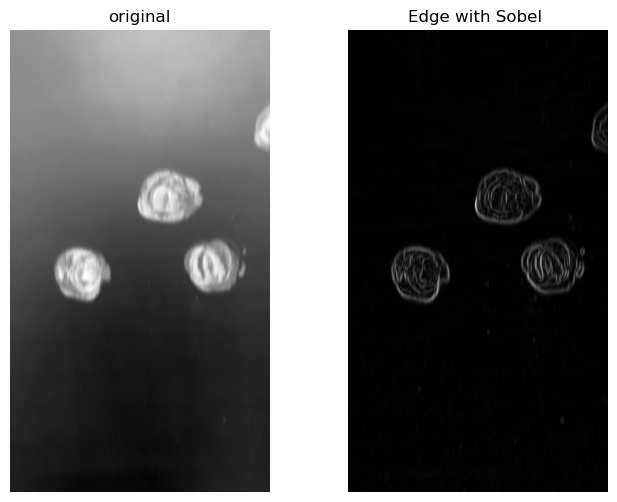

In [16]:

edge_sobel_image_sigma_4 = sobel(gaussian_image_sigma_4)
plot_comparison(gaussian_image_sigma_4, edge_sobel_image_sigma_4, "Edge with Sobel ")

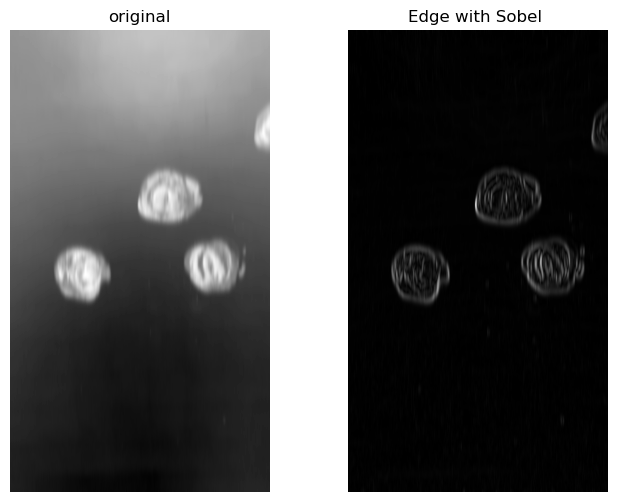

In [17]:

edge_sobel_image_sigma_10 = sobel(gaussian_image_sigma_10)
plot_comparison(gaussian_image_sigma_10, edge_sobel_image_sigma_10, "Edge with Sobel ")

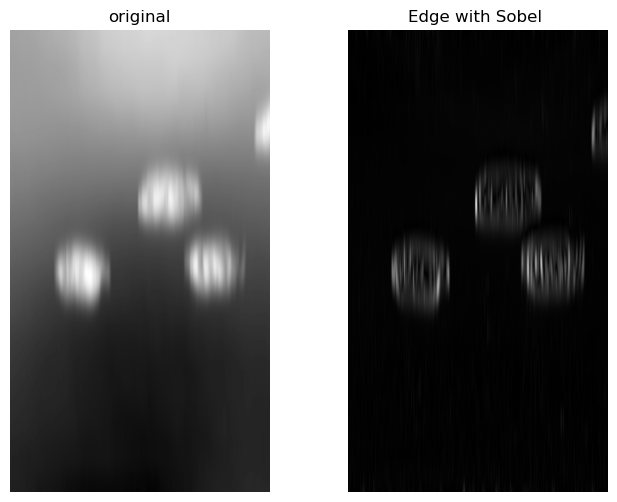

In [18]:

edge_sobel_image_sigma_20 = sobel(gaussian_image_sigma_20)
plot_comparison(gaussian_image_sigma_20, edge_sobel_image_sigma_20, "Edge with Sobel ")

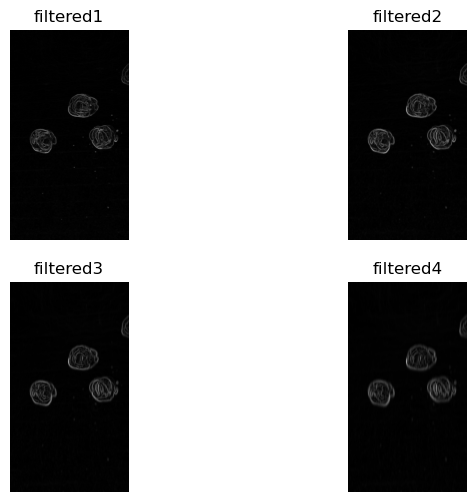

In [19]:
plot_comparison_4(edge_sobel_image_sigma_0_5,edge_sobel_image_sigma_2,edge_sobel_image_sigma_4,edge_sobel_image_sigma_10)

#### Kết luận sau khi sử dụng bộ lọc gaussian rồi sử dụng bộ lọc sobel phát hiện cạnh:
- Khi ta sử thay đổi hệ số sigma càng lớn ảnh càng mịn hơn nhưng ảnh sẽ bị mờ đi dẫn đến ảnh ngõ ra mịn nhưng cũng bị mờ theo.
- Khi ta sử với bộ lọc gaussian với hệ số sigma là 10 thì ảnh ngõ ra với bộ lọc sobel thì sẽ nhìn thấy cạnh rõ hơn và các cạnh bên trong sẽ ít hơn 

 Bài 2.3 Khảo sát lược đồ mức xám

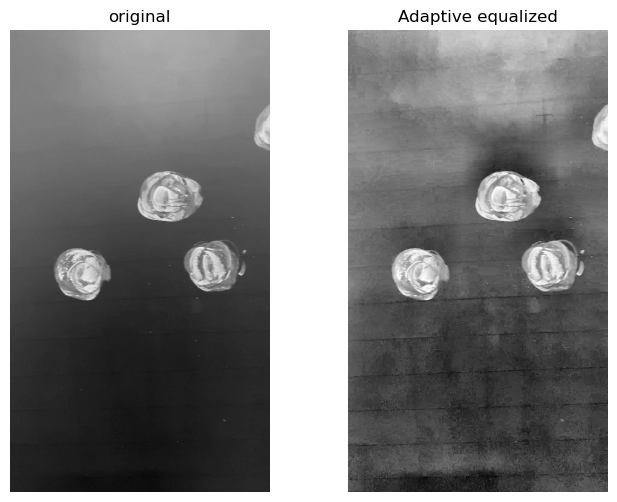

In [20]:
#Áp dụng cân bằng lược đồ mức xám cục bộ
from skimage import exposure
image_adapteq = exposure.equalize_adapthist(image20,
clip_limit=0.03)
plot_comparison(image20, image_adapteq, 'Adaptive equalized')

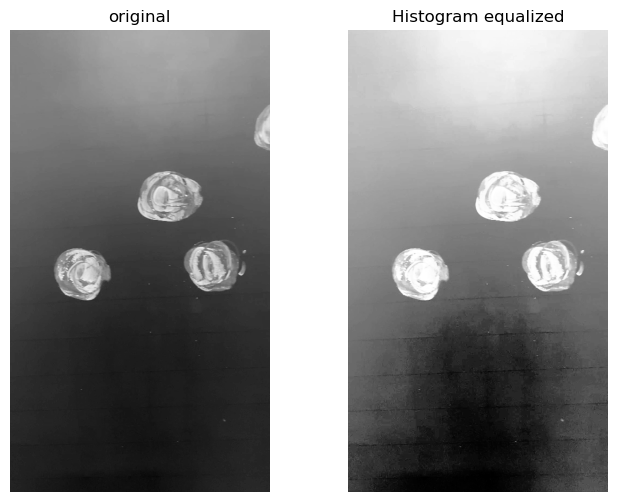

In [21]:
# Áp dụng cân bằng lược đồ mức xám toàn cục
image_eq = exposure.equalize_hist(image20)
plot_comparison(image20, image_eq, 'Histogram equalized')

#### So sánh 2 phương pháp:
- Phương pháp cân bằng mức xám cục bộ tránh được hiện tượng một số vùng trở nên quá sáng trong khi một số vùng trở nên quá tối.
- Phương pháp cân bằng mức xám toàn cục chỉ tập trung vào lược đồ mức xám của toàn ảnh chứ không quan tâm tới các chi tiết nhỏ.
- Ảnh kết quả của phương pháp cân bằng mức xám cục bộ tự nhiên hơn ảnh kết quả của phương pháp cân bằng mức xám toàn cục.
- Nên dùng Phương pháp cân bằng mức xám cục bộ khi cần làm nổi bật các đối tượng chính trong ảnh. Và Nên dùng phương pháp cân bằng mức xám toàn cục khi cần tăng độ tương phản của toàn ảnh.

In [22]:
#Bài 2.4: Cân bằng Histogram
from skimage import exposure

In [23]:
# Tiến hành cân bằng lược đồ mức xám
image_eq = exposure.equalize_hist(image1)

C:\Users\DELL\anaconda3\envs\demo_xla\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


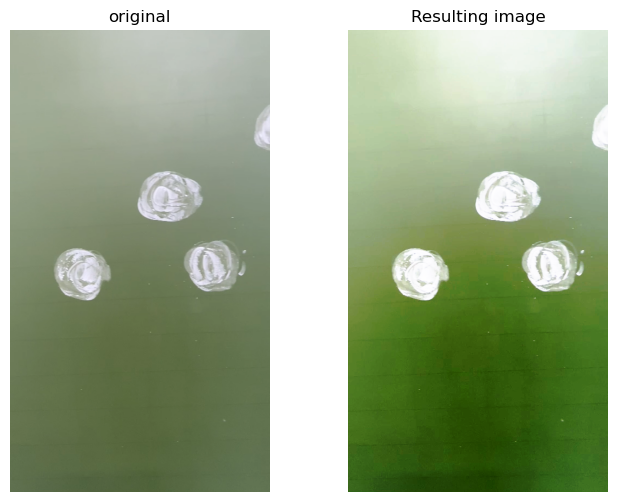

In [24]:
# Hiển thị ảnh gốc và ảnh kết quả
plot_comparison(image1, image_eq, 'Resulting image')

In [25]:
gray_image = color.rgb2gray(image1)

In [26]:
# Bài 2.5: Khảo sát lược đồ mức xám của ảnh y sinh
from skimage import exposure

In [27]:
# Thực hiện cân bằng lược đồ mức xám cho ảnh xám
image_eq1 = exposure.equalize_hist(gray_image)

In [28]:
# Thực hiện cân bằng lược đồ mức xám cho ảnh màu
image_eq2 = exposure.equalize_hist(image1)

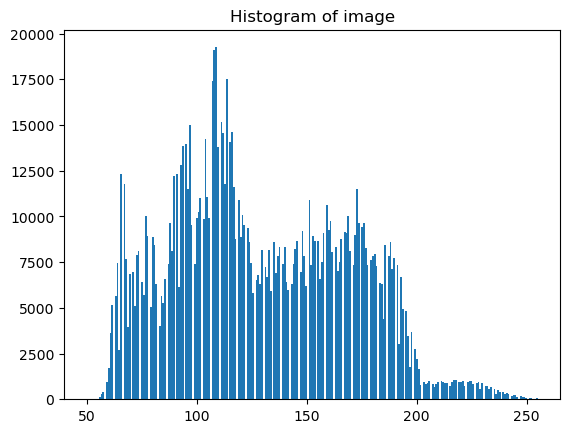

In [29]:
# chuẩn hóa ảnh DICOM về ngưỡng [0-255]
plt.figure()
plt.axis('on')
plt.hist(image1.ravel(), bins=256 )
plt.title('Histogram of image')
plt.show()

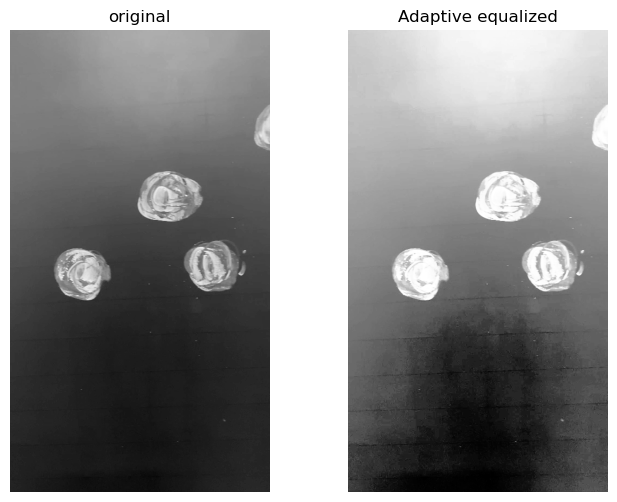

In [30]:
# hiển thị và so sánh kết quả việc sử dụng ảnh xám để cân bằng histogram
plot_comparison(gray_image, image_eq1, 'Adaptive equalized')

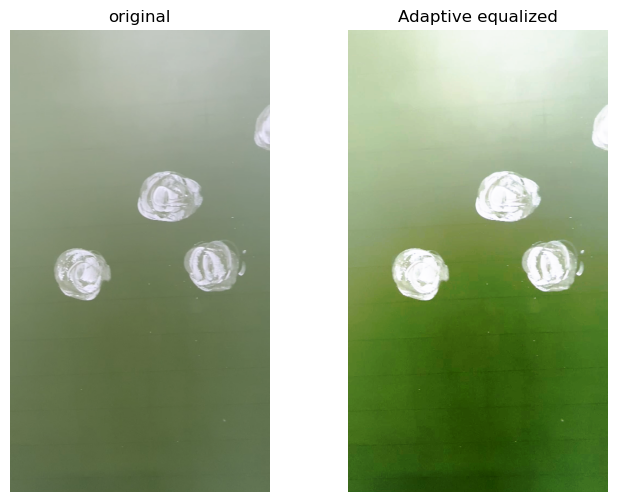

In [31]:
# hiển thị và so sánh kết quả việc sử dụng ảnh xám để cân bằng histogram
plot_comparison(image1, image_eq2, 'Adaptive equalized')

* Nhận xét việc cân bằng histogram cho ảnh xám:
    Do ảnh màu có màu sắc đa dạng, việc cân bằng histogram có thể làm nổi bật các chi tiết và cải thiện độ tương phản trong từng
    kênh màu riêng lẻ. Đối với ảnh xám, việc cân bằng histogram có thể tạo ra một phân bố mức xám đồng đều và cải thiện độ tương
    phản tổng thể của ảnh

*Kết luận nên hay không nên sử dụng histogram để tăng cường độ tương phản cho ảnh y sinh DICOM:
- Việc sử dụng histogram để tăng cường độ tương phản cho ảnh y sinh DICOM có thể hữu ích trong một số trường hợp, ta cần chú 
  ý các điểm sau:
    Mặc dù việc cân bằng histogram có thể cải thiện độ tương phản của một số ảnh DICOM, nó cũng có thể làm mất mát thông tin 
    quan trọng hoặc làm thay đổi ý nghĩa lâm sàng của ảnh. Điều này đặc biệt quan trọng trong việc xem xét các ảnh DICOM chứa
    thông tin về cấu trúc và bệnh lý.

    Việc chỉnh sửa histogram một cách tùy ý có thể làm mất tính nhất quán và tin cậy của dữ liệu y tế.
    Trong một số trường hợp, việc thay đổi độ tương phản có thể ảnh hưởng đến khả năng phân loại bệnh lý hoặc hiển thị các dấu
    hiệu quan trọng.
    

In [32]:
#Bai 2.6 Tăng cường độ tương phản sử dụng cân bằng lược đồ mức xám cục bộ
# Khai báo các thư viện cần dùng
from skimage import exposure
# Khai báo các gói thư viện cần thiết
from skimage import data, color

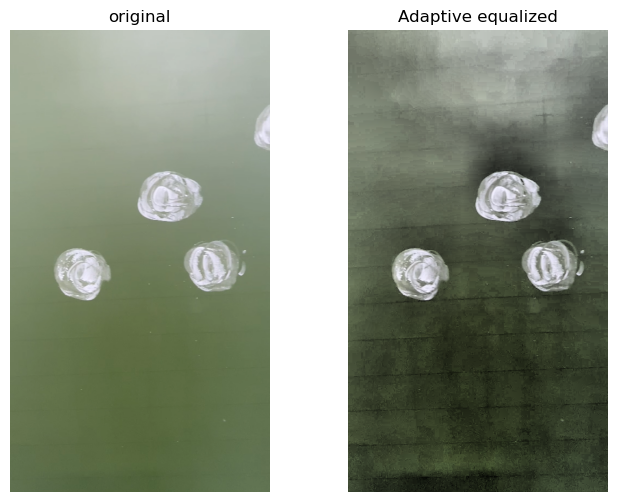

In [33]:
# ứng dụng phương pháp tăng cường cảnh cục bộ để tăng cường độ tương phản của ảnh
adapthist_eq_image =exposure.equalize_adapthist(image1, clip_limit=0.03)
plot_comparison(image1, adapthist_eq_image, 'Adaptive equalized')

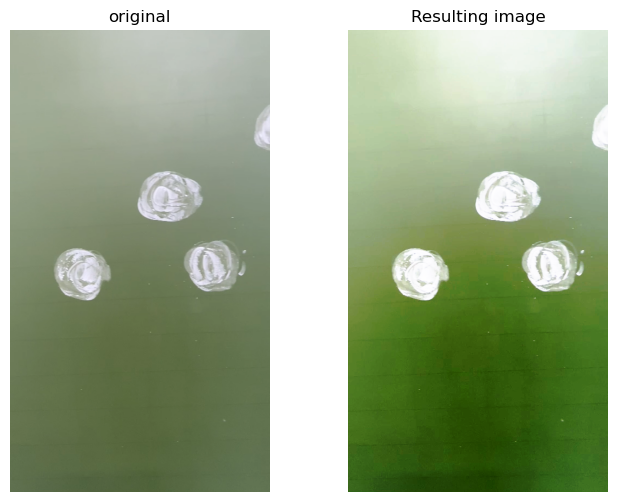

In [34]:
# ứng dụng phương pháp tăng cường cảnh truyền thống để tăng cường độ tương phản của ảnh
image_eq = exposure.equalize_hist(image1)
plot_comparison(image1, image_eq, 'Resulting image')

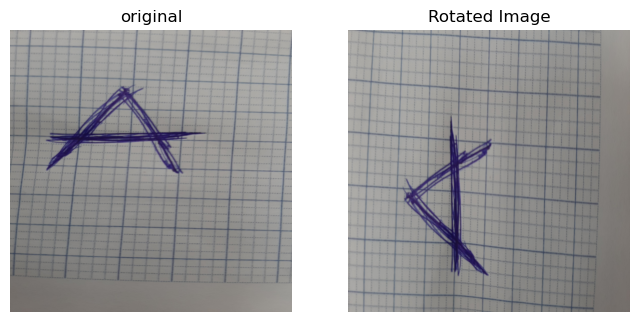

In [35]:

# Bai 2.7
# Khai báo các thư viện cần thiết
from skimage.transform import rotate,rescale,resize
# Đọc ảnh 
img1 =plt.imread(os.path.abspath("image/chua.jpg"))

## xoay ảnh thẳng đứng so với ảnh gốc
resizeImg= resize(img1,(640,640))
RotatedImage= rotate(resizeImg,90)
plot_comparison(resizeImg,RotatedImage,"Rotated Image")



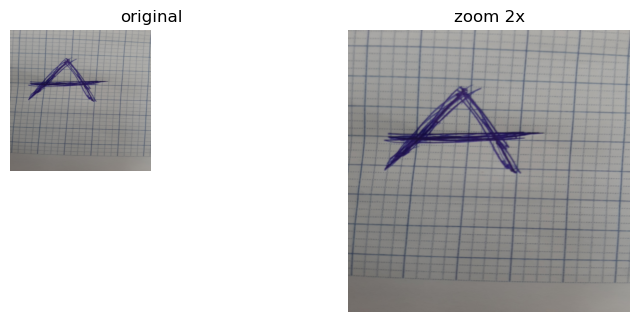

In [36]:
# # Tăng kích thước lên 2 lần sử dụng kỹ thuật khử răng cưa\
Zoom_2x_A= rescale(resizeImg,2,anti_aliasing=True,channel_axis=-1)
plot_comparison(resizeImg, Zoom_2x_A, 'zoom 2x')

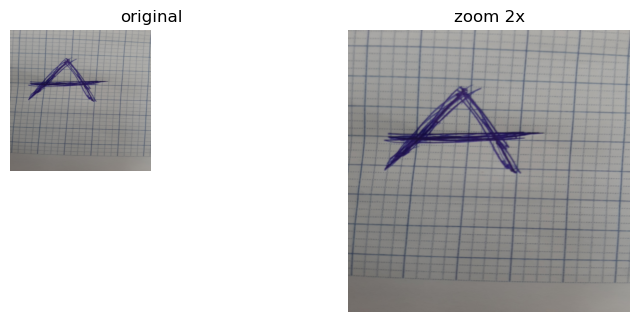

In [37]:
# tăng kích thước lên 2 lần không sử dụng kỹ thuật khử răng cưa
Zoom_2x_B= rescale(resizeImg,2,anti_aliasing=False,channel_axis=-1)
plot_comparison(resizeImg, Zoom_2x_B, 'zoom 2x')

In [38]:
import math

In [39]:
#Bai 2.8
# Khai báo các thư viện cần sử dụng
from skimage.transform import rescale
height = image1.shape[0]*(math.sqrt(3))
width = image1.shape[1]*(math.sqrt(3))

In [40]:
# Tăng kích thước ảnh lên 3 lần
Zoom_3x_image = resize(image1,(height,width),anti_aliasing=True)

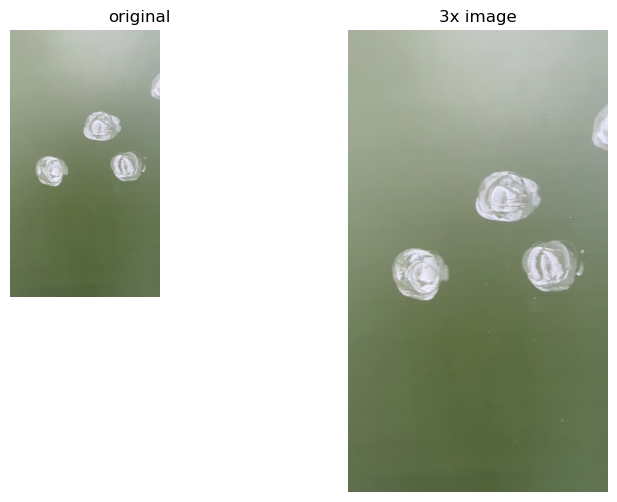

In [41]:
# hiển thị ảnh để đánh giá
plot_comparison(image1,Zoom_3x_image,"3x image")

In [42]:
#Bài 2.9 
# Khai báo thư viện cần dùng
from skimage.transform import resize

In [43]:
# khai báo chiều dài và chiều rộng của cột sau khi xử lý thay đổi kích thước ảnh
height = int(image1.shape[0] / 2)
width = int(image1.shape[1] / 2)

In [44]:
# Thực hiện thay đổi kích thước ảnh
image_resized = resize(image1, (height, width), anti_aliasing=True)

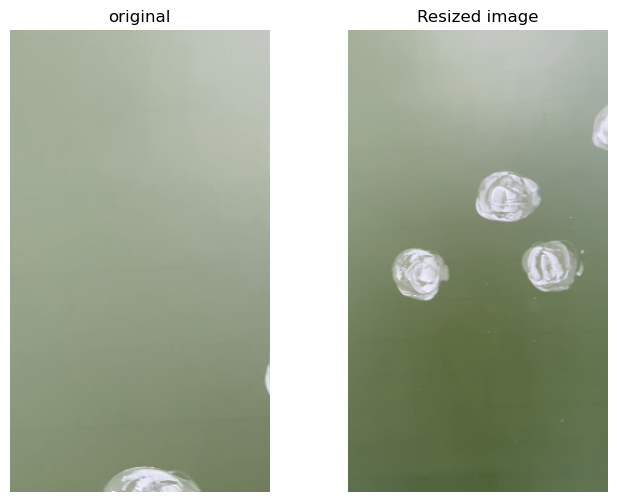

In [45]:
# Hiển thị kết quả và so sánh
plot_comparison(image1,image_resized,'Resized image')

In [46]:
#Bài tập 2.10: Xử lý Hình thái học
# Khai báo thư viện morphology
from skimage import morphology

In [47]:
#chuyển ảnh thành nhị phân
binary_image=gray_image>0.78485
selem = morphology.rectangle(2,2)

In [48]:
# Lấy ảnh kết quả bằng phép toán xói mòn binary_erosion
eroded_image = morphology.binary_erosion(binary_image, footprint = selem)

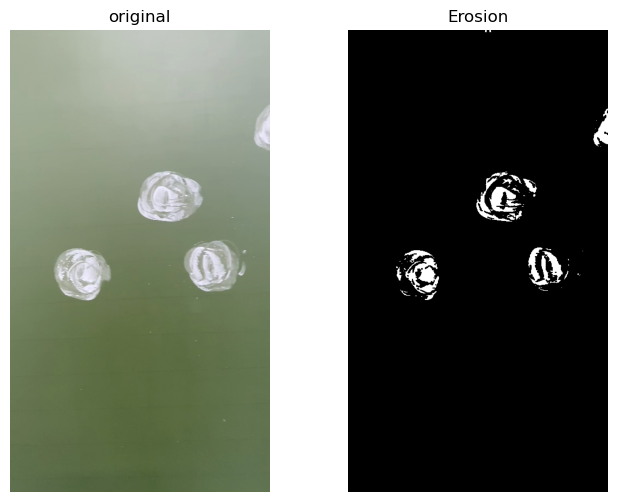

In [49]:
# Hiển thị kết quả
plot_comparison(frame, eroded_image, 'Erosion')

In [50]:
#Bài tập 2.11: Cải thiện kết quả phân ngưỡng ảnh
# Giãn nở với ảnh nhị phân
#Khai báo thư viện morphology
from skimage import morphology

In [51]:
# Giãn nở với ảnh nhị phân
dilated_image = morphology.binary_dilation(binary_image)

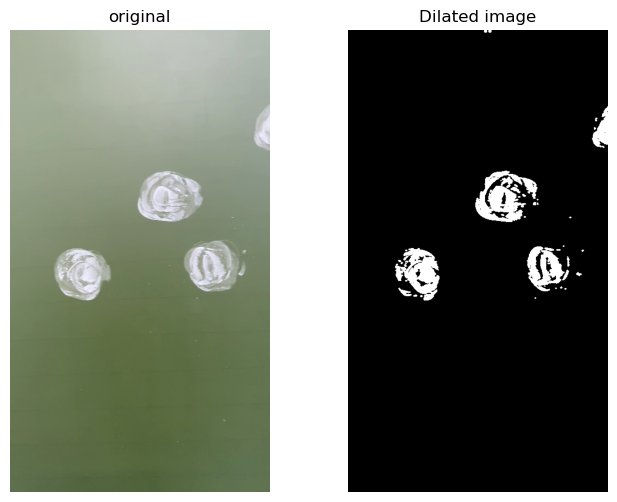

In [52]:
# Hiển thị kết quả
plot_comparison(frame, dilated_image, 'Dilated image')